<a href="https://colab.research.google.com/gist/jonghank/175e4a8dcbe89952a8347785e51696a7/matrix-imputation_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrix imputation
$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\Vec}{{\text{vec}}}
\newcommand{\argmin}{{\text{argmin}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\E}{\mathbf{E}}
\newcommand{\var}{\mathbf{var}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\B}{\mathbf{B}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> ASE7030: Convex Optimization, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_


This problem concerns arrays of real numbers on an $m \times n$
grid.
Such as array can represent an image, or a sampled description of
a function defined on a rectangle.
We can describe such an array by a matrix 
$X \in \R^{m \times n}$, where $X_{ij}$ gives the real
number
at location $i,j$, for $i=1,\ldots, m$ and $j=1,\ldots, n$.
We will think of the index $i$ as associated with the $y$ axis,
and the index $j$ as associated with the $x$ axis.

It will also be convenient to describe such an array by a vector
$x=\Vec (X) \in \R^{mn}$.
Here $\Vec$ is the function that stacks the columns of a matrix
on top of
each other:

$$
\Vec (X) = \bmat{ x_1 \\ \vdots \\ x_n }
$$

where $X = \bmat{x_1 & \cdots & x_n}$.
To go back to the array representation, from the vector, we have
$X=\Vec^{-1} (x)$.  (This looks complicated, but isn't;
$\Vec^{-1}$ just
arranges the elements in a vector into an array.)

We will need two linear functions that operate on $m \times n$ arrays.
These are simple approximations of partial differentiation with respect to the $x$ and $y$ axes, respectively.
The first function takes as argument an $m \times n$ array $X$ and returns an $m \times (n-1)$ array $V$ of forward (rightward) differences:

$$
V_{ij} = X_{i,j+1} - X_{ij}, \quad i=1, \ldots, m, \quad j = 1, \ldots, n-1.
$$

We can represent this linear mapping as multiplication by a matrix $D_x \in \R^{m(n-1) \times mn}$, which satisfies

$$
\Vec (V) = D_x \Vec(X).
$$

(This looks scarier than it is---each row of the matrix $D_x$ has exactly one $+1$ and one $-1$ entry in it.)

The other linear function, which is a simple approximation of partial differentiation with respect to the $y$ axis, maps an $m \times n$ array $X$ into an $(m-1) \times n$ array $W$, is defined as

$$
W_{ij} = X_{i+1,j} - X_{ij}, \quad i=1, \ldots, m-1, \quad 
j = 1, \ldots, n.
$$

We define the matrix $D_y \in \R^{(m-1)n\times mn}$, which
satisfies $\Vec (W) = D_y \Vec(X)$.

We define the _roughness_ of an array $X$ as

$$
R = \|D_x \Vec(X)\|_2^2 + \|D_y \Vec(X)\|_2^2.
$$

The roughness measure $R$ is the sum of the squares of the differences of each element in the array and its neighbors.
Small $R$ corresponds to smooth, or smoothly varying, $X$.
The roughness measure $R$ is zero precisely for constant arrays, i.e., when $X_{ij}$ are all equal.

Now we get to the problem, which is to interpolate some unknown values in an array in the smoothest possible way, given the known values in the array. To define this precisely, we partition the set of indices $\{1, \ldots, mn\}$ into two sets: $I_\mathrm{known}$ and $I_\mathrm{unknown}$.

We let $p \geq 1$ denote the number of known values (i.e., the number of elements in $I_\mathrm{known}$), and $q=mn-p$ the number of unknown values (the number of elements in $I_\mathrm{unknown}$).

We are given the values $x_i$ for $i \in I_\mathrm{known}$; 
the goal is to guess (or estimate or assign) values for $x_i$ for $i \in I_\mathrm{unknown}$.

We'll choose the values for $x_i$, with $i \in I_\mathrm{unknown}$, so that the resulting $X$ is as smooth as possible, i.e., so it minimizes $R$. 
Thus, the goal is to fill in or interpolate missing data in a 2D array (an image, say), so the reconstructed array is as smooth as possible.

We give the $p$ known values in a vector $x_\mathrm{k} \in \R^{p}$, and the $q=mn-p$ unknown values in a vector $x_\mathrm{u} \in \R^{mn-p}$.

The complete array is obtained by putting the entries of $x_\mathrm{k}$ and $x_\mathrm{u}$ into the correct positions of the array.

We describe these operations using two matrices $Z_\mathrm{k} \in \R^{mn \times p}$ and $Z_\mathrm{u} \in \R^{mn \times (mn-p)}$, that satisfy

$$
\Vec(X) = Z_\mathrm{k}x_\mathrm{k} +
Z_\mathrm{u}x_\mathrm{u}.
$$

(This looks complicated, but isn't: Each row of these matrices is a unit vector, so multiplication with either matrix just stuffs the entries of the $w$ vectors into particular locations in $\Vec(X)$.  In fact, the matrix $\bmat{Z_\mathrm{k} & Z_\mathrm{u}}$ is an $mn \times mn$ permutation matrix.)

In summary, you are given the problem data $x_\mathrm{k}$ (which gives the known array values), $Z_\mathrm{k}$ (which gives the locations of the known values), and $Z_\mathrm{u}$ (which gives the locations of the unknown array values, in some specific order).

Your job is to find $x_\mathrm{u}$ that minimizes $R$.

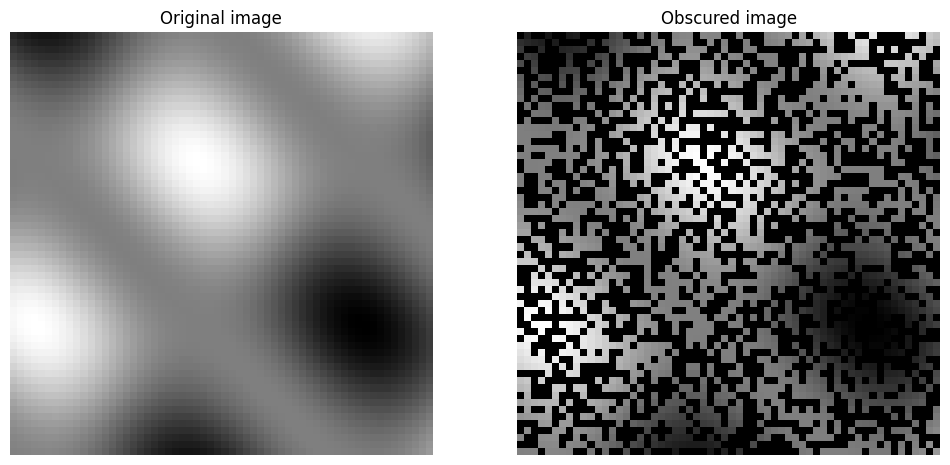

In [1]:
import numpy as np
import scipy.sparse as ssp
import matplotlib.pyplot as plt

u = np.linspace(-2, 2, 60)
v = np.linspace(-2, 2, 60)

U, V = np.meshgrid(u, v)

X_original = np.sin(-U+V-1)**2*np.cos(U+V+1) + 1

xmin = np.min(X_original)
xmax = np.max(X_original)

m,n = X_original.shape

B = np.random.rand(m, n) > 0.50

X_obscured = B*X_original

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(X_original, cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.subplot(122)
plt.imshow(X_obscured, cmap='gray')
plt.title('Obscured image')
plt.axis('off')
plt.show()

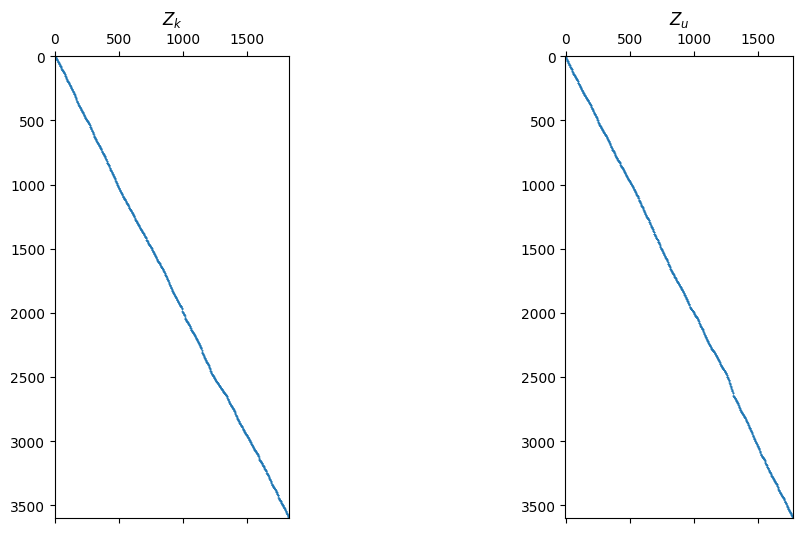

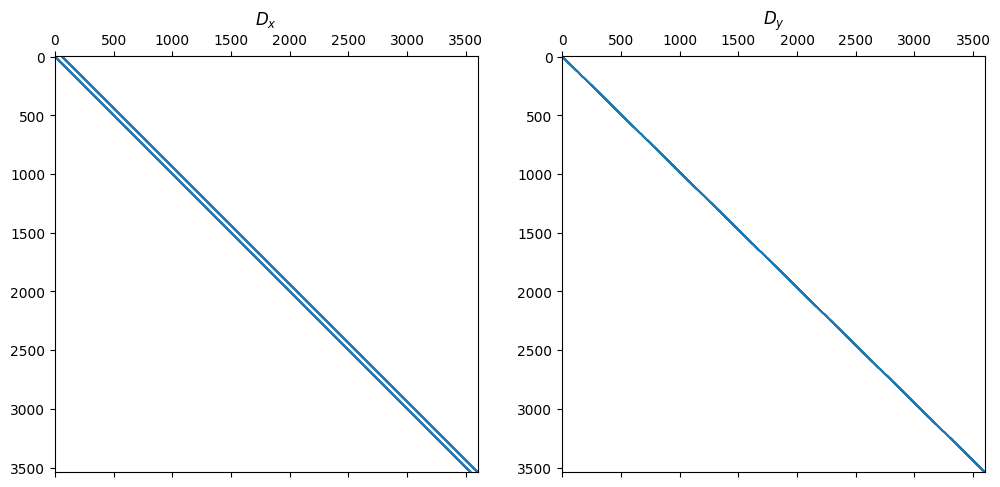

In [2]:
mn = m*n
p = np.sum(B)
q = mn - p

B_k = B.flatten('F')
B_u = 1-B.flatten('F')

Z_k = ssp.coo_matrix( ( np.ones(p), ( np.where(B_k>0)[0], range(p) ) ), 
    shape=(mn, p), dtype=np.int8)
Z_u = ssp.coo_matrix( ( np.ones(q), ( np.where(B_u>0)[0], range(q) ) ), 
    shape=(mn, q), dtype=np.int8)
x_k = Z_k.T@X_original.flatten('F')

Dx = ssp.hstack( [ np.zeros( (m*(n-1),m) ), ssp.eye( m*(n-1) ) ] ) \
   - ssp.hstack( [ ssp.eye( m*(n-1) ), np.zeros( (m*(n-1),m) ) ] )
Dy = ssp.kron( ssp.eye(n), np.diff(np.eye(m), axis=0) )

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.spy(Z_k, markersize=0.2)
plt.title(r'$Z_{k}$')
plt.xticks(np.arange(0,p,500))
plt.subplot(122)
plt.spy(Z_u, markersize=0.2)
plt.title(r'$Z_{u}$')
plt.xticks(np.arange(0,q,500))
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.spy(Dx, markersize=0.2)
plt.title(r'$D_x$')
plt.subplot(122)
plt.spy(Dy, markersize=0.2)
plt.title(r'$D_y$')
plt.show()

We can express our roughness measure directly in terms of the vector of known
values $x_\mathrm{k}$ and unknown values $x_\mathrm{u}$
as

\begin{eqnarray*}
R &=&
\| D_x (Z_\mathrm{k} x_\mathrm{k} + Z_\mathrm{u} x_\mathrm{u}) \|^2 \\
&& + \| D_y (Z_\mathrm{k} x_\mathrm{k} +
Z_\mathrm{u} x_\mathrm{u}) \|^2\\
&=& 
\left\| \bmat{D_x \\ D_y } Z_\mathrm{k} x_\mathrm{k}
+\bmat{D_x \\ D_y } Z_\mathrm{u} x_\mathrm{u}\right\|^2.
\end{eqnarray*}

Defining

$$
A = \bmat{D_x \\ D_y} Z_\mathrm{u}, \quad
b = -\bmat{D_x \\ D_y} Z_\mathrm{k} x_\mathrm{k},
$$

we can express the problem in the familiar form

$$
\begin{array}{ll}
\mbox{minimize} &  \| A x_\mathrm{u} - b \|^2 .\\
\end{array}
$$

Provided $A$ is skinny and full rank, the solution is

\begin{eqnarray*}
x_\mathrm{unknown} &=& A^\dagger b\\
&=& (A^TA)^{-1}A^Tb\\
&=&
- \left( Z_\mathrm{u}^T (D_x^TD_x+D_y^TD_y)
Z_\mathrm{u} \right)^{-1} 
\left( Z_\mathrm{u}^T (D_x^TD_x+D_y^TD_y)
Z_\mathrm{k} \right) x_\mathrm{k}.
\end{eqnarray*}

When is $A \in \R^{(2mn-m-n)\times (mn-p)}$ skinny and full
rank?
It's always skinny, since $2mn-m-n\geq mn-p$.
If $A$ were not full rank, then there would exist some nonzero $w$ with
$Aw=0$.  This means that $Z_\mathrm{u} w$ is in the
nullspace of both $D_x$ and $D_y$, which means that $Z_\mathrm{u} w$ is a constant (i.e., its entries are all the same).  This means that we have to have $w=0$, assuming there is at least one 
known array value.
In other words, $A$ is _always_ full rank and skinny.

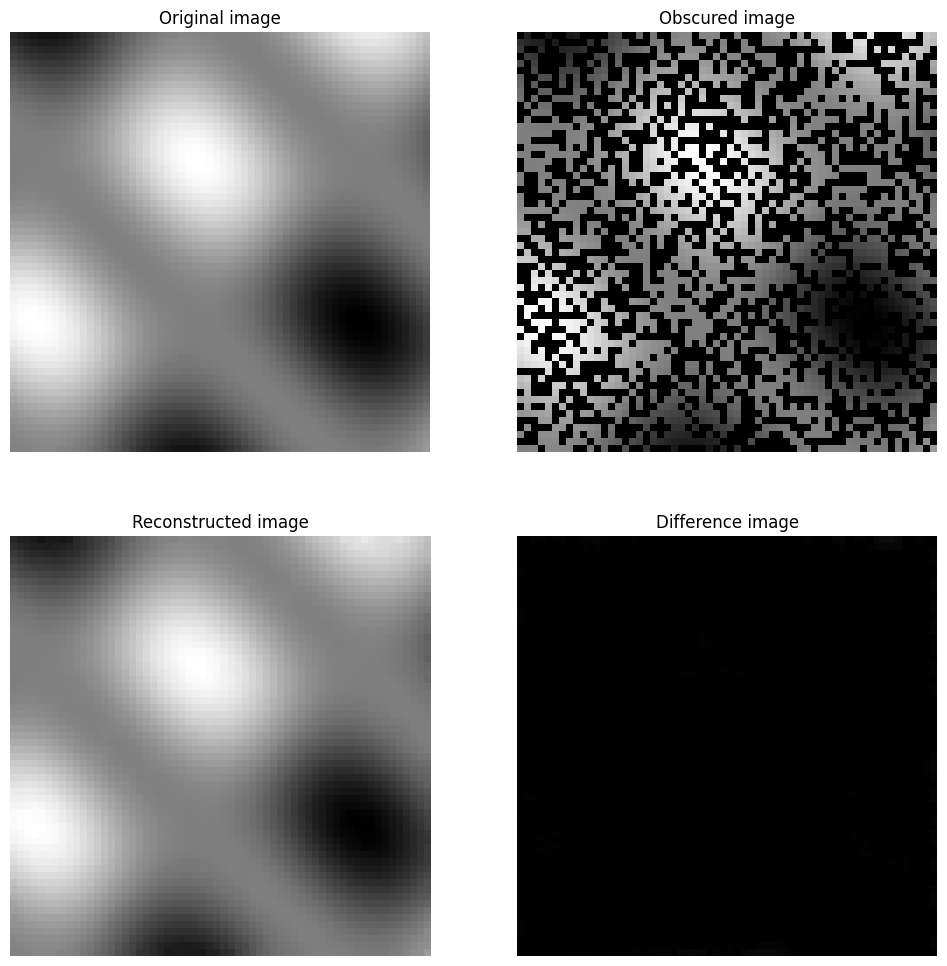

In [3]:
import scipy.sparse.linalg as sla

DD = ssp.vstack( [ Dx, Dy ] )

A_MATRIX = DD@Z_u
B_MATRIX = DD@Z_k@x_k

x_u = sla.lsqr(A_MATRIX, -B_MATRIX)[0]
X_recon_L2 = (Z_k@x_k + Z_u@x_u).reshape(m, n, order='F')

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(X_original, cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.subplot(222)
plt.imshow(X_obscured, cmap='gray')
plt.title('Obscured image')
plt.axis('off')
plt.subplot(223)
plt.imshow(X_recon_L2, cmap='gray')
plt.title('Reconstructed image')
plt.axis('off')
plt.subplot(224)
plt.imshow(np.abs(X_recon_L2-X_original), cmap='gray', vmin=xmin, vmax=xmax)
plt.title('Difference image')
plt.axis('off')
plt.show()

---
<div style="text-align: right"> 
References:
  
1) Course notes on EE263: Introduction to linear dynamical systems, http://ee263.stanford.edu
  
</div>

